In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import datetime
import random
import yaml

In [3]:
from elvis.config import ScenarioConfig, ScenarioRealisation
from elvis.simulate import simulate
from elvis.utility.elvis_general import create_time_steps
from elvis.set_up_infrastructure import wallbox_infrastructure

In [4]:
input_folder = '../data/config_builder/'

In [5]:
tst = os.listdir(input_folder)

Choose one test case and comment out all others

In [6]:
# case = 'customer_parking_night.yaml'
# case = 'customer_parking_day.yaml'

# case = 'office.yaml'
# case = 'office_fleet.yaml'

# case = 'residential.yaml'
# case = 'wohnblock.yaml'


# case = 'gasstation_speedway.yaml'
# case = 'tankstelle_city.yaml'

# case = 'cabstand.yaml'
# case = 'roadside.yaml'
case = 'PnR.yaml'

In [7]:
with open(input_folder + case, 'r') as file:
    yaml_str = yaml.full_load(file)

config = ScenarioConfig.from_yaml(yaml_str)

Config settings

In [8]:
print(config)

Vehicle types: <generator object ScenarioConfig.__str__.<locals>.<genexpr> at 0x7ff89708bad0>Mean parking time: 9
Std deviation of parking time: 1
Mean value of the SOC distribution: 0.5
Std deviation of the SOC distribution: 0.3
Number of charging events per week: 100
Vehicles are disconnected only depending on their parking time
Queue length: 0
Opening hours: None
Scheduling policy: Uncontrolled



In [9]:
start_date = '2020-11-16T00:00:00'
end_date = '2020-11-22T23:59:00'
resolution = '0:15:00'
realisation = config.create_realisation(start_date, end_date, resolution)
result = simulate(realisation)

#### Load profile
No preload considered.

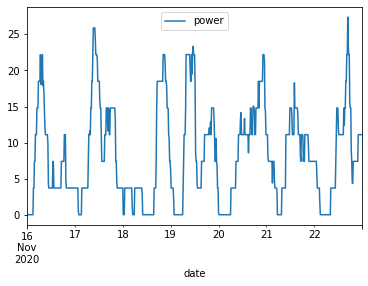

In [10]:
import pandas as pd
from elvis.utility.elvis_general import num_time_steps

start = realisation.start_date
end = realisation.end_date
res = realisation.resolution
load_profile = result.aggregate_load_profile(num_time_steps(start, end, res))
df = pd.DataFrame(zip(create_time_steps(start, end, res), load_profile))

df.rename(columns={0: 'date', 1: 'power'}, inplace=True)
df.set_index('date', inplace=True)

df.plot()

#### Arrival distribution

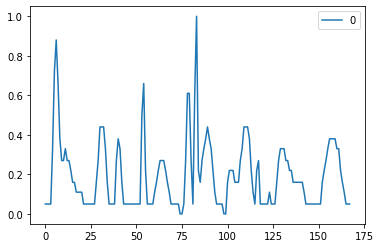

In [11]:
pd.DataFrame(yaml_str['arrival_distribution']).plot()

Max power in kW

In [12]:
result.max_load()

27.4064593740896

Max simultaneity

In [13]:
result.simultaneity_factor(infrastructure=realisation.infrastructure)

0.7407151182186379

In [14]:
result.simultaneity_factor(infrastructure=realisation.infrastructure, bins=[0., 1e-20,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

[(121, 0.0),
 (7, 1e-20),
 (173, 0.1),
 (92, 0.2),
 (128, 0.3),
 (69, 0.4),
 (44, 0.5),
 (33, 0.6),
 (5, 0.7),
 (0, 0.8),
 (0, 0.9)]

Simultaneity factor over time

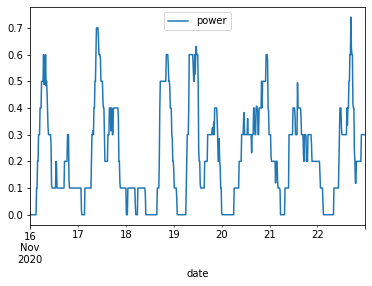

In [15]:
total_power = result.get_power_connection_points(config.infrastructure) #ye ye name refactor will come
sf = df/total_power
sf.plot()